In [1]:
import torch
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torchvision.transforms.functional as F


import utils

In [2]:
model = maskrcnn_resnet50_fpn(pretrained=True, progress=False)
model = model.eval()

inst_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

inst_class_to_idx = {cls: idx for (idx, cls) in enumerate(inst_classes)}

In [3]:
DATA_PATH = './dataset/medium/'
embed = lambda x: torch.tensor([0])
dataset = utils.ColorfulClothesBin(DATA_PATH, embed=embed, train=True)

In [4]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [92]:
data = dataset[3806]
org_img, img, _, _ = data
img = img.unsqueeze(0)
output = model(img)[0]
print([inst_classes[label] for label in output['labels']])
print(output['scores'])

['person', 'cup', 'tv', 'microwave', 'person', 'dining table', 'person', 'chair', 'bowl', 'dining table', 'person', 'couch', 'dining table', 'refrigerator', 'spoon', 'microwave', 'chair', 'bed', 'bench', 'person', 'bench', 'chair', 'dining table', 'chair', 'dining table', 'dining table']
tensor([0.9969, 0.9597, 0.6572, 0.5459, 0.4853, 0.2329, 0.2230, 0.1812, 0.1580,
        0.1198, 0.1154, 0.1079, 0.1042, 0.0999, 0.0838, 0.0832, 0.0766, 0.0727,
        0.0723, 0.0717, 0.0715, 0.0699, 0.0627, 0.0605, 0.0564, 0.0529],
       grad_fn=<IndexBackward0>)


shape = torch.Size([26, 1, 224, 224]), dtype = torch.bool
shape of image = torch.Size([3, 224, 224])


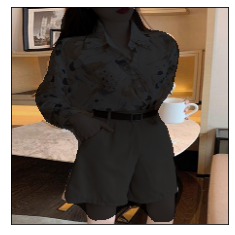

In [93]:
proba_threshold = 0.5
bool_masks = output['masks'] > proba_threshold
print(f"shape = {bool_masks.shape}, dtype = {bool_masks.dtype}")
print(f"shape of image = {org_img.shape}")

# There's an extra dimension (1) to the masks. We need to remove it
bool_masks = bool_masks.squeeze(1)

show(draw_segmentation_masks(org_img, bool_masks[0], alpha=0.8))

In [98]:
mask = bool_masks[0]
org_img = org_img * mask
pprint(org_img)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
